# 2D visualization
In this session we explore 2D lists and their plots. These are useful when you start working on numerical methods in the engineering courses.

As an illustration, we create a 2D list that has values depending on two Gaussian functions - both offset from eachother to create a hill and a valley appearance.

First we create a list that contain the distance variables for the x-axis and copy that to the distances for the y-axis. We choose to have about 25 values along each direction.

In [27]:
x = list(map(lambda a: a*0.4, list(range(0,50,1))))

In [28]:
y = x[:]

We need the math module to use the exponential function.

In [29]:
import math

We define a function that returns the value as per the Gaussian function. The parameters are the origin (x0, y0) and the standard deviation sd.

In [4]:
def gauss(x1, y1, x0, y0, sd):
    rsq = math.sqrt((x1-x0)**2 + (y1-y0)**2)
    return math.exp(-(rsq/sd**2))

We import the numpy module to use ndarrays.

In [5]:
import numpy as np

We create an empty 2D array.

In [6]:
z = np.zeros([50, 50])

## 2D scalar field

We define a 2D scalar field as follows:

$$ z(x,y) = A_0 \exp \left(- \left[ (x-x_0)^2 + (y-y_0)^2 \over \sigma_0^2 \right] \right) + A_2 \exp \left(- \left[ (x-x_2)^2 + (y-y_2)^2 \over \sigma_2^2 \right] \right) $$

In [36]:
for i in range(0,50,1):
    for j in range(0,50,1):
        z[i,j] = 1.1*gauss(x[i], y[j], 5, 5, 3) + 0.9*gauss(x[i], y[j], 15, 15, 3)

We now import the plotting module.

In [37]:
% matplotlib inline
import matplotlib.pyplot as plt

Text(0.5,1,'A hill and a valley')

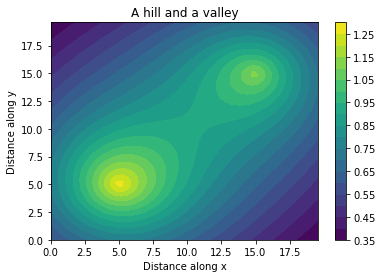

In [38]:
plt.contourf(x,y,z, 20)
plt.colorbar()
plt.xlabel('Distance along x')
plt.ylabel('Distance along y')
plt.title('A hill and a valley')

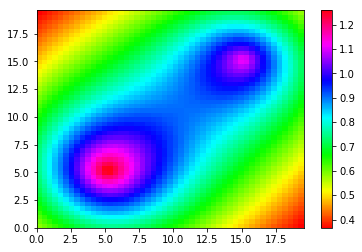

In [39]:
fig1 = plt.pcolormesh(x,y,z, cmap='hsv')
plt.colorbar()

## 2D vector field

We can use quiver plots to show arrows that indicate the direction of gradient (slope) of the scalar field in 2D space. We need to create two arrays that store the gradient components along x and y directions. We can use central difference to evaluate the gradients.

$$ \vec{g} = \vec{\nabla}z = \left( \partial z \over \partial x \right) \, \hat{i} + \left( \partial z \over \partial y \right) \, \hat{j} = g_x \, \hat{i} + g_j \, \hat{j} $$

In [40]:
gx = np.zeros([48, 48]);
gy = np.zeros([48, 48]);

for i in range(2,48,1):
    for j in range(2,48,1):
        gx[i,j] = z[i+1,j] - z[i-1,j];
        gy[i,j] = z[i,j+1] - z[i, j-1];

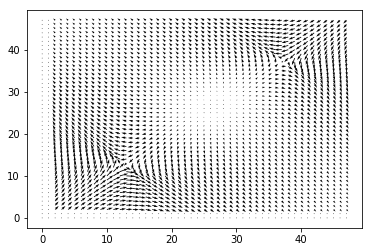

In [41]:
fig2 = plt.quiver(gx, gy)

## Superposing contour maps with quiver plots

We can superpose plots and see the variation of the parameter along z in a more intuitive manner.

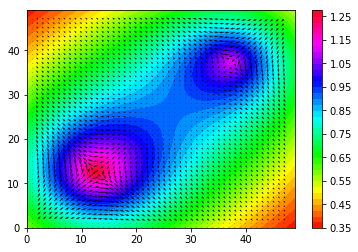

In [42]:
plt.contourf(z, 40, cmap='hsv')
plt.colorbar()
plt.quiver(gx,gy)

Notice the direction of the gradient vectors at the peak and valley created by positive and negative gaussians, respectively.

## 3D visualization

You can visualize the above scalar field in 3D too.

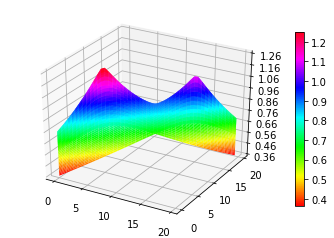

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.hsv, linewidth=1, antialiased=True)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.8, aspect=20)
plt.show()